In [1]:
####################Kaggle Username: oortega20#########################
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd

In [92]:
#############################Problem 1##########################################
reg = 0.07
X = np.array([[0,3,1],[1,3,1],[0,1,1],[1,1,1]])
y = np.array([1,1,0,0]).reshape((-1,1))

def sigmoid_fn(X, w):
    gamma = X @ w
    return 1 / (1 + np.exp(-gamma))





def newtons(data, labels,reg, num_iters = 2):
    w = np.zeros((data.shape[1], 1))
    s_i = sigmoid_fn(data, w)
    print(s_i, 'Value for s', 0)
    for i in range(num_iters):
        grad = gradient(data,w,labels, reg)
        s_i = sigmoid_fn(data, w)
        prod = np.multiply(s_i, 1 -s_i)
        omega = prod * np.eye(len(data))
        hessian = data.T @ omega @  data
        eps = np.linalg.solve(hessian, grad)
        w = w - eps
        print(w, 'value for w', i + 1)
        s_i = sigmoid_fn(data,w)
        
        print(s_i, 'value for s', i + 1)
       

In [93]:
newtons(X, y, reg)

[[0.5]
 [0.5]
 [0.5]
 [0.5]] Value for s 0
[[ 0.]
 [ 2.]
 [-4.]] value for w 1
[[0.88079708]
 [0.88079708]
 [0.11920292]
 [0.11920292]] value for s 1
[[-2.66682959]
 [-0.1982017 ]
 [ 3.06323299]] value for w 2
[[0.92191304]
 [0.45061115]
 [0.94609049]
 [0.54938885]] value for s 2


In [2]:
#############################Problem 4###########################################
WINE = sio.loadmat('data.mat')

Part A:
$$J(w) =  \lambda \|w\|_{2}^{2} - \sum_{i = 1}^{n}( y_i \ln s_i + (1 - y_i) ln(1 - s_i)$$
$$ \nabla w = 2\lambda w - \sum_{i = 1}^{n} y_i \frac{1}{s_i}s_i' + (1 - y_i) \frac{1}{1 - s_i} -s_i'$$
$$ \nabla w = 2\lambda w - \sum_{i = 1}^{n} (y_i \frac{1}{s_i}s_i(1 - s_i) + (1 - y_i) \frac{1}{1 - s_i} -(s_i)(1 - s_i))X_i$$
$$ \nabla w = 2\lambda w - X^{T}(y - s)$$

This implies that the batch gradient update formula is as follows:
$$w_{k + 1} = w_{k} - \alpha(2\lambda w  - X^{T}(y - s))$$
Where alpha is the learning rate.

In [29]:
train_data, train_labels = WINE['X'], WINE['y']
SEED = 42
np.random.seed(SEED)
reg = 1
alpha = 1e-6

In [52]:
def accuracy(pred, actual):
    correct = 0
    for i in range(len(pred)):
        if pred[i] == actual[i]:
            correct += 1
    return correct / len(pred)

def gradient(X, w, y, reg):
    s_m = sigmoid_fn(X, w)
    reg_term = 2 * reg
    return  (reg_term * w) - (X.T @ (y - s_m))

def gradient_stoch(X, w, y, reg):
    s_m = sigmoid_fn(X, w)
    return (2 * reg * w) - (y - s_m) * X

def sigmoid_fn(X, w):
    gamma = X @ w
    return 1 / (1 + np.exp(-gamma))

def compute_batch_loss(reg, w, data, labels):
    l_w_norm = reg * (np.linalg.norm(w) ** 2)
    s = sigmoid_fn(data, w)
    return l_w_norm - ((labels.T @ np.log(s)) + ((1 - labels).T @ np.log(1 - s)))[0][0]


In [5]:
def batch_gradient_descent(data, labels, alpha, reg, num_iters = 1000000):
    losses = []
    w = np.zeros((data.shape[1], 1))
    for i in range(num_iters):
        w = w - (alpha * gradient(data, w, labels, reg))
        if i % 100 == 0:
            l = compute_batch_loss(reg, w, data, labels)
            losses.append(l)
        if i % 20000 == 0:
            print(l, "loss at iter", i)
    return w, losses

In [7]:
w, batch_loss = batch_gradient_descent(train_data, train_labels, alpha, reg)

21107.22397176709 loss at iter 0
829.407289647531 loss at iter 20000
713.7978928804923 loss at iter 40000
645.2478178025785 loss at iter 60000
605.4418220848523 loss at iter 80000
587.7638903918303 loss at iter 100000
575.1755021081589 loss at iter 120000
565.9426209888879 loss at iter 140000
559.0330453383187 loss at iter 160000
553.7851942412057 loss at iter 180000
549.7529382671897 loss at iter 200000
546.6247166274126 loss at iter 220000
544.1774896217282 loss at iter 240000
542.248640967191 loss at iter 260000
540.7179156928443 loss at iter 280000
539.4953557018687 loss at iter 300000
538.5130103513148 loss at iter 320000
537.7191178184213 loss at iter 340000
537.0739518719997 loss at iter 360000
536.5468167249425 loss at iter 380000
536.113847503228 loss at iter 400000
535.7563842715795 loss at iter 420000
535.4597594286863 loss at iter 440000
535.2123862057833 loss at iter 460000
535.0050685696856 loss at iter 480000
534.8304753148216 loss at iter 500000
534.6827368588533 loss a

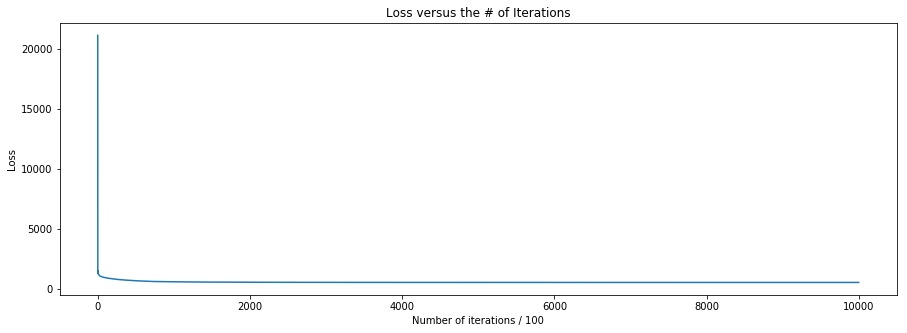

In [8]:
plt.figure(figsize = (15, 5))
plt.title('Loss versus the # of Iterations')
plt.xlabel('Number of iterations / 100')
plt.ylabel('Loss')
plt.plot(list(range(len(batch_loss))), batch_loss)
plt.show()

Part b:
$$J(w) =  \lambda \|w\|_{2}^{2} - \sum_{i = 1}^{n}( y_i \ln s_i + (1 - y_i) ln(1 - s_i)$$
$$\nabla w = 2\lambda w - \sum_{i = 1}^{n} y_i \frac{1}{s_i}s_i' + (1 - y_i) \frac{1}{1 - s_i} -s_i'$$
$$\nabla w = 2\lambda w - \sum_{i = 1}^{n} (y_i \frac{1}{s_i}s_i(1 - s_i) + (1 - y_i) \frac{1}{1 - s_i} -(s_i)(1 - s_i))X_i$$
$$\nabla w = 2\lambda w - X_{i}^{T}(y - s)$$

When we are performing batch gradient descent, we only take the gradient with one of the sample points which implies that the batch gradient update formula is as follows:
$$w_{k + 1} = w_{k} - \alpha(2\lambda w  - (y_i - s))X_i$$
Where alpha is the learning rate and $X_i$ is the current training point we are using when computing the approximation to the gradient.

In [9]:
def stochastic_gradient_descent(data, labels, alpha, reg, num_iters = 1000000):
    losses = []
    num_points = data.shape[0]
    w = np.zeros((data.shape[1], 1))
    for i in range(num_iters):
        w = w - (alpha * gradient_stoch(data[i % num_points,:], w, labels[i % num_points,:], reg))
        if i % 100 == 0:
            l = compute_batch_loss(reg, w, data, labels)
            losses.append(l)
        if i % 20000 == 0:
            print(l, "loss at iter", i)
    return w, losses

In [10]:
reg = 1
alpha = 1e-7
w, stoch_loss = stochastic_gradient_descent(train_data, train_labels, alpha, reg)

4158.768610707443 loss at iter 0
3379.1978773859646 loss at iter 20000
3066.249567017828 loss at iter 40000
2925.3388146639077 loss at iter 60000
2848.441339693245 loss at iter 80000
2804.777735951122 loss at iter 100000
2783.0803855687027 loss at iter 120000
2767.0298036307354 loss at iter 140000
2756.4617888980356 loss at iter 160000
2753.4738093194624 loss at iter 180000
2748.770963020351 loss at iter 200000
2745.100659920013 loss at iter 220000
2746.2986217933067 loss at iter 240000
2744.260997977129 loss at iter 260000
2742.2604569960645 loss at iter 280000
2744.4910436482296 loss at iter 300000
2743.11935797004 loss at iter 320000
2741.539318242707 loss at iter 340000
2744.031223529624 loss at iter 360000
2742.8286157929006 loss at iter 380000
2741.3555529257496 loss at iter 400000
2743.9140199862577 loss at iter 420000
2742.754513973469 loss at iter 440000
2741.3087347134897 loss at iter 460000
2743.8841819924223 loss at iter 480000
2742.7356728128952 loss at iter 500000
2741.29

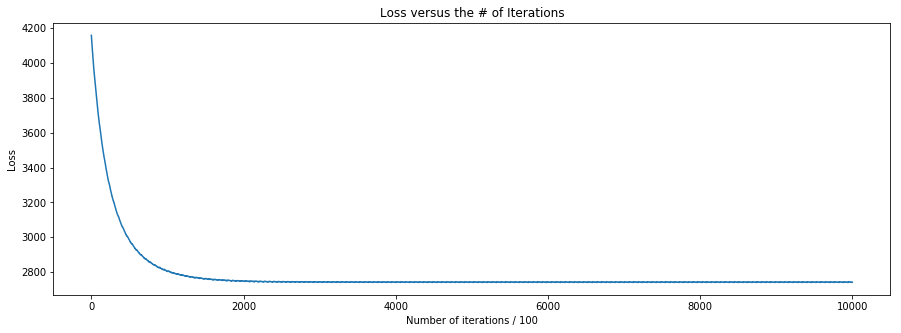

In [11]:
plt.figure(figsize = (15, 5))
plt.title('Loss versus the # of Iterations')
plt.xlabel('Number of iterations / 100')
plt.ylabel('Loss')
plt.plot(list(range(len(stoch_loss))), stoch_loss)
plt.show()

Things to note between the differences of convergence of batch gradient descent and regular gradient descent:


1: Batch gradient descent achieves a much lower loss


2: Stochastic gradient descent had a tendency to oscillate more around its minima, while BGD continued to go down slightly.


3: Stochastic gradient descent also tends to converge at a slowere rate when compared to batch gradient descent.

In [12]:
def stochastic_gradient_descent_cool(data, labels, alpha, reg, num_iters = 1000000):
    losses = []
    num_points = data.shape[0]
    w = np.zeros((data.shape[1], 1))
    alpha_init = alpha
    for i in range(num_iters):
        alpha = alpha_init / (num_iters + 1)
        w = w - (alpha * gradient_stoch(data[i % num_points,:], w, labels[i % num_points,:], reg))
        if i % 100 == 0:
            l = compute_batch_loss(reg, w, data, labels)
            losses.append(l)
        if i % 20000 == 0:
            print(l, "loss at iter", i)
    return w, losses

In [14]:
alpha = 1
w, stoch_cool_loss = stochastic_gradient_descent_cool(train_data, train_labels, alpha, reg)

4157.73856271834 loss at iter 0
2751.153504669174 loss at iter 20000
2733.9513179686714 loss at iter 40000
2758.8951946455377 loss at iter 60000
2745.2099901428387 loss at iter 80000
2733.8912604329275 loss at iter 100000
2758.895017873082 loss at iter 120000
2745.2103429364256 loss at iter 140000
2733.8915220373497 loss at iter 160000
2758.8952092950544 loss at iter 180000
2745.21048472666 loss at iter 200000
2733.8916281360184 loss at iter 220000
2758.8952891607546 loss at iter 240000
2745.2105455322417 loss at iter 260000
2733.891674854658 loss at iter 280000
2758.8953252540723 loss at iter 300000
2745.2105737020984 loss at iter 320000
2733.8916970248747 loss at iter 340000
2758.895342795989 loss at iter 360000
2745.2105877156205 loss at iter 380000
2733.8917083109077 loss at iter 400000
2758.895351935497 loss at iter 420000
2745.2105951862013 loss at iter 440000
2733.8917144669967 loss at iter 460000
2758.895357036995 loss at iter 480000
2745.210599452043 loss at iter 500000
2733.8

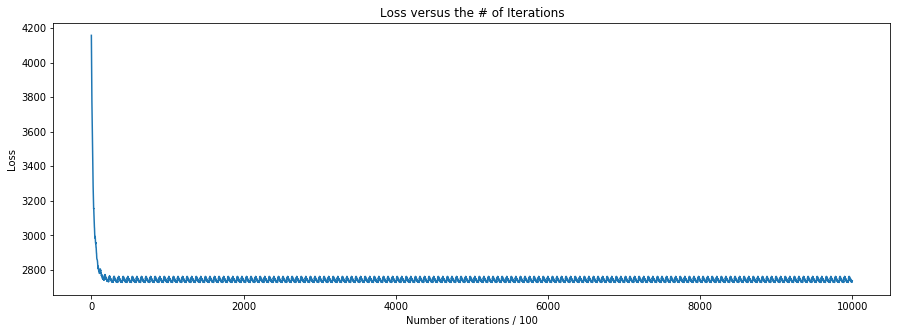

In [15]:
plt.figure(figsize = (15, 5))
plt.title('Loss versus the # of Iterations')
plt.xlabel('Number of iterations / 100')
plt.ylabel('Loss')
plt.plot(list(range(len(stoch_cool_loss))), stoch_cool_loss)
plt.show()

In comparison to the stochastic gradient descent implementation without the learning rate that cools, This implementation of stochastic gradient descent appears to converge at a much faster rate, although it also appears that the oscillaton as a function of the number of iterations appears to be much greater than that of the original stochastic gradient descent. This probably has to do with my learning rate.

In [53]:
############Part D#############################################################################################################


def logistic_regression(w, data, threshhold):
    predictions = []
    for i in range(len(data)):
        label = data[i]
        prob = sigmoid_fn(label, w)
        if prob > threshhold:
            predictions.append(1)
        else:
            predictions.append(0)
    return np.array(predictions).reshape((-1,1))

In [59]:
###################Newton's method for Kaggle###############################
def newtons(data, labels, alpha, reg, num_iters = 50):
    w = np.zeros((data.shape[1], 1))
    print('reg', reg)
    for i in range(num_iters):
        grad = gradient(data,w,labels, reg)
        s_i = sigmoid_fn(data, w)
        prod = np.multiply(s_i, 1 -s_i)
        omega = prod * np.eye(len(data))
        hessian = data.T @ omega @  data
        try:
            eps = np.linalg.solve(hessian, grad)
        except:
            eps = np.linalg.lstsq(hessian, grad)
        w = w - (alpha * eps)
        if i % 10 == 0:
            l = compute_batch_loss(reg, w, data, labels)
            print(l, ': num_iter', i)
    return w.reshape((-1,1))

In [61]:
alpha = 1
split_size, threshold = 4800, 0.5
total_data = np.hstack([train_data, train_labels])
print(total_data.shape)
np.random.shuffle(total_data)
t_data, t_labels = total_data[:,:-1], total_data[:, -1:]

t_s_data, t_s_labels = t_data[:split_size], t_labels[:split_size]
val_data, val_labels = t_data[split_size:], t_labels[split_size:]
print(val_data.shape, val_labels.shape, t_s_data.shape, t_s_labels.shape)
w_lengths = [0] + [10 ** x for x in range(-10 , -1)]
accuracies = []
for length in w_lengths:
    print(length, 'current lambda')
    w = newtons(t_s_data, t_s_labels, alpha, length)
    pred = logistic_regression(w, val_data, threshold)
    acc = accuracy(pred, val_labels)
    print(acc, 'this is validation set accuracy')
    accuracies.append((length, acc))
    

(6000, 13)
(1200, 12) (1200, 1) (4800, 12) (4800, 1)
0 current lambda
reg 0
963.43293622839 : num_iter 0
219.8204453888843 : num_iter 10
219.82044538888425 : num_iter 20
219.8204453888842 : num_iter 30
219.8204453888842 : num_iter 40
0.9891666666666666 this is validation set accuracy
1e-10 current lambda
reg 1e-10
963.4329362418166 : num_iter 0
219.82044571760383 : num_iter 10
219.8204457176039 : num_iter 20
219.82044571760383 : num_iter 30
219.82044571760386 : num_iter 40
0.9891666666666666 this is validation set accuracy
1e-09 current lambda
reg 1e-09
963.432936362656 : num_iter 0
219.8204486760795 : num_iter 10
219.82044867607956 : num_iter 20
219.8204486760795 : num_iter 30
219.8204486760795 : num_iter 40
0.9891666666666666 this is validation set accuracy
1e-08 current lambda
reg 1e-08
963.4329375710507 : num_iter 0
219.82047826082277 : num_iter 10
219.8204782608228 : num_iter 20
219.8204782608227 : num_iter 30
219.82047826082263 : num_iter 40
0.9891666666666666 this is validation 

Kaggle Username: oortega20
Best Score: .97986 %

#####Write-Up#########################


For classifying the test data, I used hyper-parameter tuning of the regularization hyper-parameter lambda and found that the best value, in terms of the values I tried,classifying the validation data set was 1e-6. I used newtons method and ran for 50 iterations because I noticed that the loss would converge by that point.

In [62]:

def results_to_csv(pred):
    pred = pred.astype(int)
    df = pd.DataFrame({'Category': pred})
    df.index += 1
    df.to_csv('submission.csv', index_label = 'Id')


In [67]:
reg = 1e-6
t_data = WINE['X_test']
w = newtons(t_s_data, t_s_labels, alpha, reg)

reg 1e-06
963.4330704944699 : num_iter 0
219.82373242647174 : num_iter 10
219.8237324264717 : num_iter 20
219.82373242647176 : num_iter 30
219.8237324264717 : num_iter 40


In [77]:
pred = logistic_regression(w, t_data, threshold).reshape((-1,))
print(pred.shape)

(497,)


In [78]:
results_to_csv(pred)